In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 40)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score, recall_score, precision_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from tqdm import tqdm

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

In [4]:
strokedata = pd.read_csv(r'C:\Users\HP\Python files\ADA\stroke-data.csv')
strokedata.head(4)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1


In [5]:
strokedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
strokedata['bmi'].isnull().sum()

201

In [7]:
strokedata['bmi'].mean()

28.893236911794666

In [8]:
strokedata.dropna(axis=0, inplace= True)
strokedata.head(6)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1


In [9]:
strokedata.shape

(4909, 12)

In [10]:
strokedata['stroke'].unique()

array([1, 0], dtype=int64)

In [11]:
strokedata.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
#minimum age is 0.08????? ah!

locate = strokedata['age'] == 0.08

strange = strokedata[locate]

In [13]:
print(strange)

         id  gender   age  hypertension  heart_disease ever_married work_type  \
1614  47350  Female  0.08             0              0           No  children   
3295  29955    Male  0.08             0              0           No  children   

     Residence_type  avg_glucose_level   bmi smoking_status  stroke  
1614          Urban             139.67  14.1        Unknown       0  
3295          Rural              70.33  16.9        Unknown       0  


In [14]:
strokedata.drop(index= [1614, 3295], inplace= True)

In [15]:
strokedata.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000
mean,37063.666191,42.882812,0.091910,0.049521,105.305274,28.898696,0.042592
std,20998.618719,22.543159,0.288928,0.216975,44.427880,7.850959,0.201957
min,77.000000,0.160000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18600.000000,25.000000,0.000000,0.000000,77.075000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55226.000000,60.000000,0.000000,0.000000,113.520000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [16]:
count = strokedata[strokedata['age'] < 1]['age'].count()
count

40

In [17]:
strokedata = strokedata.drop(strokedata[(strokedata['age'] <= 1)].index)
strokedata

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [18]:
strokedata.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000
mean,37060.783217,43.274241,0.092760,0.049979,105.374130,28.995043,0.042986
std,20993.297065,22.275257,0.290126,0.217925,44.534054,7.815051,0.202847
min,77.000000,1.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18597.500000,25.000000,0.000000,0.000000,77.072500,23.700000,0.000000
50%,37544.500000,45.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55229.000000,61.000000,0.000000,0.000000,113.545000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [19]:
strokedata['age'] = strokedata['age'].astype(int)

In [20]:
strokedata['age'].value_counts(bins= 10, sort= False)

(0.918, 9.1]    412
(9.1, 17.2]     377
(17.2, 25.3]    428
(25.3, 33.4]    470
(33.4, 41.5]    521
(41.5, 49.6]    564
(49.6, 57.7]    668
(57.7, 65.8]    529
(65.8, 73.9]    376
(73.9, 82.0]    517
Name: age, dtype: int64

In [21]:
strokage = strokedata.drop(strokedata[(strokedata['age'] >= 9)].index)
strokage

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,30669,Male,3,0,0,No,children,Rural,95.12,18.0,Unknown,0
251,16523,Female,8,0,0,No,Private,Urban,110.89,17.6,Unknown,0
282,33759,Female,3,0,0,No,children,Urban,73.74,16.0,Unknown,0
291,11014,Male,4,0,0,No,children,Rural,79.17,20.0,Unknown,0
327,65535,Male,8,0,0,No,children,Rural,78.05,25.7,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5052,31836,Female,6,0,0,No,children,Urban,91.05,22.1,Unknown,0
5070,62425,Female,5,0,0,No,children,Urban,61.98,16.8,Unknown,0
5078,27446,Female,8,0,0,No,children,Urban,76.31,15.5,Unknown,0
5079,42709,Male,1,0,0,No,children,Urban,77.28,17.1,Unknown,0


In [22]:
strokage['ever_married'].unique()

array(['No'], dtype=object)

In [23]:
strokage['stroke'].unique()

array([0], dtype=int64)

In [24]:
#we should check for the minimum age with stroke
strokeonly = strokedata.drop(strokedata[(strokedata['stroke'] == 0)].index)
strokeonly

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
243,40460,Female,68,1,1,Yes,Private,Urban,247.51,40.5,formerly smoked,1
244,17739,Male,57,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,49669,Female,14,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,27153,Female,75,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1


In [25]:
strokeonly['age'].describe()

count    209.000000
mean      67.712919
std       12.402848
min       14.000000
25%       58.000000
50%       70.000000
75%       78.000000
max       82.000000
Name: age, dtype: float64

In [26]:
strokedata.corr(numeric_only=True)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.009479,0.001207,0.004075,0.007214,0.003772,0.004899
age,0.009479,1.000000,0.273419,0.257386,0.237461,0.317779,0.232475
hypertension,0.001207,0.273419,1.000000,0.115375,0.180560,0.165379,0.141966
heart_disease,0.004075,0.257386,0.115375,1.000000,0.154572,0.038787,0.137537
avg_glucose_level,0.007214,0.237461,0.180560,0.154572,1.000000,0.175400,0.138964
bmi,0.003772,0.317779,0.165379,0.038787,0.175400,1.000000,0.040039
stroke,0.004899,0.232475,0.141966,0.137537,0.138964,0.040039,1.000000


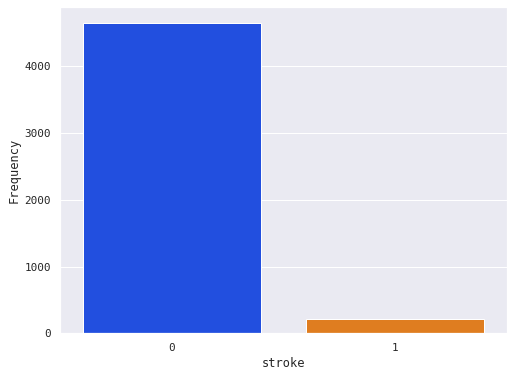

In [27]:
plt.figure(figsize= (8, 6))
sns.set(style= 'darkgrid', palette= "bright", font= 'monospace')
sns.countplot(data= strokedata, x= 'stroke')
plt.xlabel('stroke')
plt.ylabel('Frequency')
plt.show()

In [28]:
strokedata['stroke'].value_counts()

0    4653
1     209
Name: stroke, dtype: int64

In [29]:
strokedata['hypertension'].value_counts()

0    4411
1     451
Name: hypertension, dtype: int64

In [30]:
strokedata['heart_disease'].value_counts()

0    4619
1     243
Name: heart_disease, dtype: int64

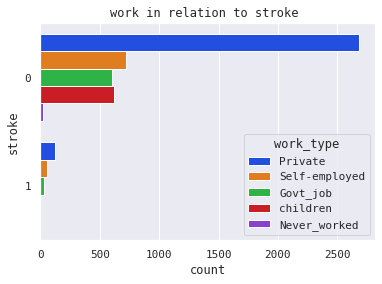

In [31]:
sns.countplot(data=strokedata, y= 'stroke', hue='work_type')
plt.title("work in relation to stroke ")
plt.show()


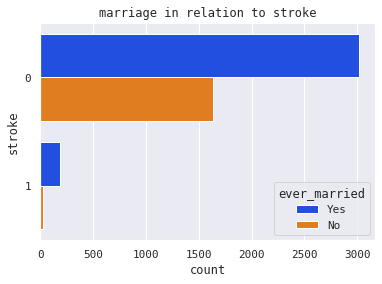

In [32]:
sns.countplot(data=strokedata, y='stroke', hue= 'ever_married')
plt.title("marriage in relation to stroke")
plt.show()

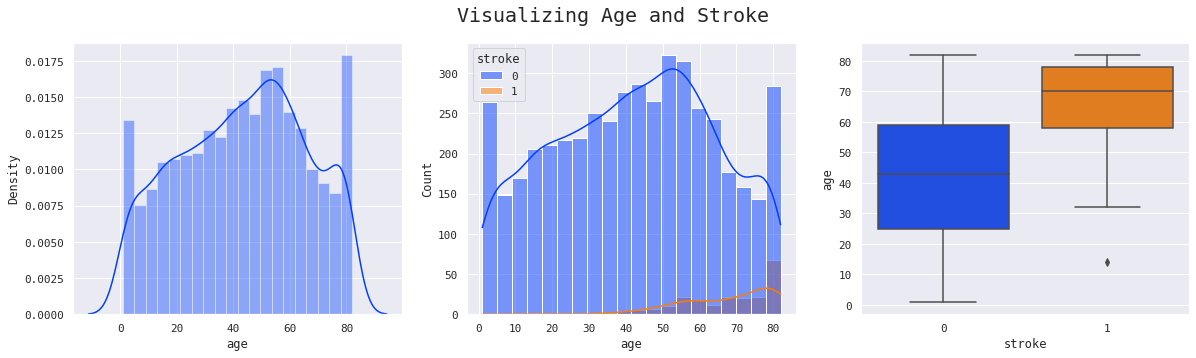

In [33]:
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(1,3,figsize=(20,5))
sns.distplot(strokedata['age'],ax=ax[0])
sns.histplot(data= strokedata, x='age',ax=ax[1],hue='stroke',kde=True)
sns.boxplot(x=strokedata['stroke'],y=strokedata['age'],ax=ax[2])
plt.suptitle("Visualizing Age and Stroke",size=20)
plt.show()

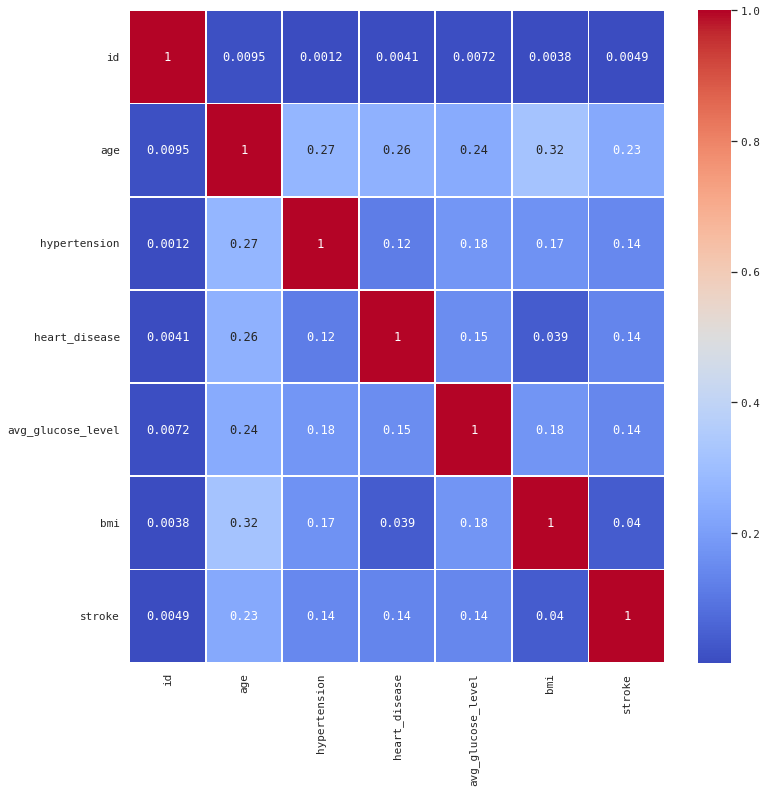

In [34]:
warnings.filterwarnings('ignore')
plt.figure(figsize = (12,12))
sns.heatmap(strokedata.corr(), linewidths=0.9,annot=True,cmap='coolwarm');

In [35]:
strokedata.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1


In [36]:
encoder = LabelEncoder()

strokedata['gender']=encoder.fit_transform(strokedata['gender'])
strokedata['ever_married']=encoder.fit_transform(strokedata['ever_married'])
strokedata['work_type']=encoder.fit_transform(strokedata['work_type'])
strokedata['Residence_type']=encoder.fit_transform(strokedata['Residence_type'])
strokedata['smoking_status']=encoder.fit_transform(strokedata['smoking_status'])
strokedata.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67,0,1,1,2,1,228.69,36.6,1,1
2,31112,1,80,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81,0,0,1,2,1,186.21,29.0,1,1


In [37]:
X = strokedata.drop(['id','stroke'], axis=1)
y = strokedata['stroke']

In [38]:
print(f'The shape of the original dataset is {strokedata.shape}')
print(f'The shape of X is {X.shape}')
print(f'The shape of y is {y.shape}')

The shape of the original dataset is (4862, 12)
The shape of X is (4862, 10)
The shape of y is (4862,)


In [41]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [42]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [43]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [44]:
stroke_model_results = pd.DataFrame(columns=["Model", "Accuracy Score"])

In [45]:
#Testing various classifiers to see which gives the best accuracy score

stroke_models = [("Logistic Regression", LogisticRegression(random_state=101)), 
              ("Random Forest", RandomForestClassifier(random_state=101,n_estimators = 50)),
              ("Support Vector Machines", SVC(random_state=101,gamma=1, C = 100,probability = True)),
              ("Gaussian Naive Bayes", GaussianNB()),
              ("Bernoulli Naive Bayes", BernoulliNB()),
              ("KNN", KNeighborsClassifier(n_neighbors=3)),
              ("Decision Tree", DecisionTreeClassifier(random_state=101  )),
              ("Bagging Classifier", BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators = 250), random_state=101)),
              ("Adaboost Classifier", AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),random_state = 101,n_estimators =150 )),
              ("Gradient Boosting", GradientBoostingClassifier(random_state = 101,n_estimators = 250))]

In [46]:
for clf_name, clf in tqdm(stroke_models):
    clf.fit(X_train_sm, y_train_sm)
    predictions = clf.predict(X_test)
    score = accuracy_score(y_test, predictions)
    ypred_prob = clf.predict_proba(X_test)[:, 1]
    rocAuc_score = roc_auc_score(y_test, ypred_prob, average= 'weighted')
    precision = precision_score(y_test, predictions, average= 'weighted')
    f1 = f1_score(y_test, predictions, average= 'weighted')
    recall = recall_score(y_test, predictions, average= 'weighted') 
    new_row = {'Model': clf_name, 
               'Accuracy Score': score, 
               'Roc_Auc_score':rocAuc_score,
               'Precision Score':precision, 
               'F1 Score': f1,
               'Recall Score': recall}
    stroke_model_results = stroke_model_results.append(new_row, ignore_index=True)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.71s/it]


In [47]:
stroke_model_results.sort_values(by= 'Accuracy Score', ascending= False)

,Model,Accuracy Score,Roc_Auc_score,Precision Score,F1 Score,Recall Score
9,Gradient Boosting,0.938335,0.750882,0.928939,0.933394,0.938335
1,Random Forest,0.935252,0.747353,0.926214,0.930564,0.935252
7,Bagging Classifier,0.927030,0.776904,0.931001,0.928981,0.927030
2,Support Vector Machines,0.910586,0.562145,0.923773,0.916997,0.910586
6,Decision Tree,0.902364,0.585213,0.928727,0.914697,0.902364
8,Adaboost Classifier,0.901336,0.573308,0.927185,0.913510,0.901336
5,KNN,0.852004,0.602770,0.925726,0.885148,0.852004
3,Gaussian Naive Bayes,0.762590,0.791008,0.946176,0.832182,0.762590
0,Logistic Regression,0.756423,0.815841,0.947341,0.828099,0.756423
4,Bernoulli Naive Bayes,0.591984,0.769040,0.948167,0.706467,0.591984


In [49]:
def rocAuc_curve(stroke_model, stroke_model_name):
    '''
    A function that plots the area under the rate of characteristic curve
    '''
    ypred_prob = stroke_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresh = roc_curve(y_test, ypred_prob)
    
    rocAuc_score = roc_auc_score(y_test, ypred_prob)
    
    plt.figure(figsize=(5,5))
    #plotting roc_auc curve
    plt.plot(fpr, tpr, linestyle="--", color="limegreen", label="ROC AUC Score: (%0.5f)" % rocAuc_score)
    #plotting a diagonal line
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    
    plt.title(f"{stroke_model_name} ROC Curve", size=10)
    plt.xlabel("False Positive Rate", size = 10)
    plt.ylabel("True Positive Rate", size = 10)
    plt.legend(loc="lower right", prop={"size": 10})
    plt.show()

In [50]:
#Analyzing gradient boosting

gb = GradientBoostingClassifier(random_state = 101, n_estimators = 250)
gb.fit(X_train_sm, y_train_sm)

GradientBoostingClassifier(n_estimators=250, random_state=101)

In [51]:
gb.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [52]:
print(f'The classification report of the model is\n')
print(classification_report(y_test,predictions))

The classification report of the model is

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       931
           1       0.20      0.14      0.17        42

    accuracy                           0.94       973
   macro avg       0.58      0.56      0.57       973
weighted avg       0.93      0.94      0.93       973



In [54]:
confusion_matrix(y_test,predictions)

array([[907,  24],
       [ 36,   6]], dtype=int64)

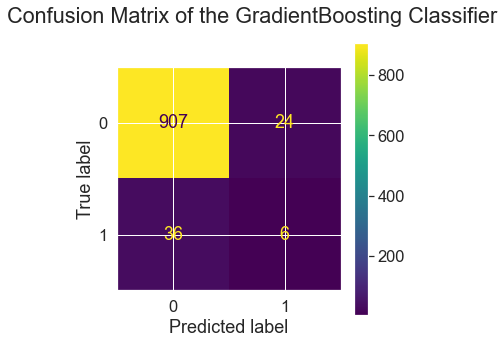

In [55]:
sns.set(style= 'darkgrid', palette= 'bright',font_scale = 1.5)
fig, ax = plt.subplots(figsize=(5,5))
cm = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(cm, display_labels=gb.classes_)
disp.plot(ax = ax)
plt.suptitle("Confusion Matrix of the GradientBoosting Classifier")
plt.show()

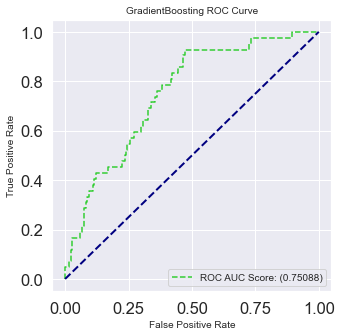

In [56]:
rocAuc_curve(gb, 'GradientBoosting')

In [57]:
#Analyzing random forest

rf = RandomForestClassifier(random_state=101,n_estimators = 50)
rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(n_estimators=50, random_state=101)

In [58]:
rf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [59]:
confusion_matrix(y_test,predictions)

array([[907,  24],
       [ 36,   6]], dtype=int64)

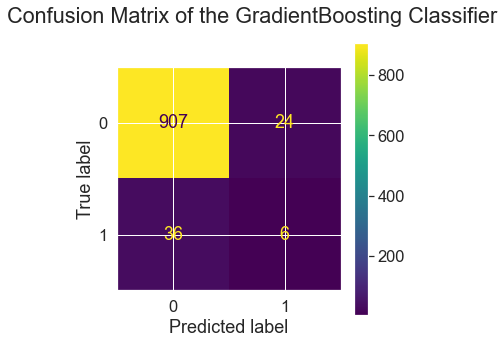

In [61]:
sns.set(style= 'darkgrid', palette= 'bright',font_scale = 1.5)
fig, ax = plt.subplots(figsize=(5,5))
cm = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(cm, display_labels=gb.classes_)
disp.plot(ax = ax)
plt.suptitle("Confusion Matrix of the GradientBoosting Classifier")
plt.show()

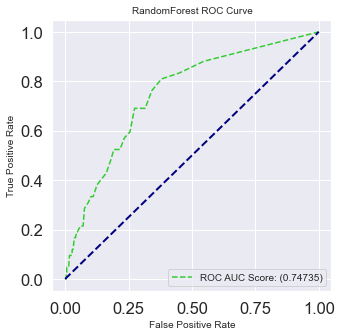

In [60]:
rocAuc_curve(rf, 'RandomForest')

In [62]:
#analyzing bagging classifier

bg = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators = 250), random_state=101)
bg.fit(X_train_sm, y_train_sm)

BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=250),
                  random_state=101)

In [63]:
bg.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [64]:
confusion_matrix(y_test,predictions)

array([[907,  24],
       [ 36,   6]], dtype=int64)

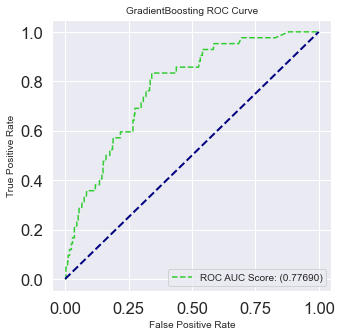

In [65]:
rocAuc_curve(bg, 'GradientBoosting')